In [1]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Basic Background of Decision Tree and Random Forest
A **Decision Tree** is the building block of a **Random Forest** and is an intuitive model. We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class (or continuous value in the case of regression). This is an interpretable model because it makes classifications much like we do: we ask a sequence of queries about The representation for the CART model is a binary tree.

The basic used in Decision Tree is called the **CART (Classification and Regression Tree)**.

In CART algorith each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a dataset with two inputs (x) of height in centimeters and weight in kilograms the output of sex as male or female, below is a crude example of a binary decision tree (completely fictitious for demonstration purposes only).the available data we have until we arrive at a decision (in an ideal world).

Given a dataset with two inputs (x) of height in centimeters and weight in kilograms the output of sex as male or female, below is a crude example of a binary decision tree (completely fictitious for demonstration purposes only).
A very simple example of a Decision Tree is as follows.

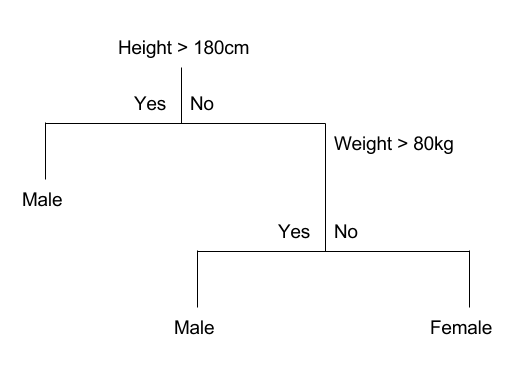


The technical details of a decision tree are in how the questions about the data are formed. In the CART algorithm, a decision tree is built by determining the questions (called splits of nodes) that, when answered, lead to the greatest reduction in Gini Impurity. What this means is the decision tree tries to form nodes containing a high proportion of samples (data points) from a single class by finding values in the features that cleanly divide the data into classes.

**Random Forest** is a type of supervised machine learning algorithm based on ensemble learning. **Ensemble Learning** is a type of learning where different types of algorithms or same algorithm multiple times are joined to form a more powerful prediction model. ***The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest"***. The Random Forest algorithm can be used for ***both regression and classification tasks***.





# Key Concepts Explained
A Decision Tree is built by determining the answer to the questions (called **Splits of Nodes**) that lead to the Greatest reduction in **Gini Impurity** or has the Greatest **Information Gain**. This means, the decision tree ***tries to form nodes containing a high proportion of samples (data points) from a single class by finding values in the features that cleanly divide the data into classes***.

In **Decision Tree** classification a tree structure is constructed that breaks the dataset down into smaller subsets eventually resulting in a prediction. There are decision nodes that partition the data and leaf nodes that give the prediction that can be followed by traversing simple IF..AND..AND….THEN logic down the nodes.

# The root node (the first decision node) partitions the data based on the most influential feature partitioning. 
# There are 2 measures for this, 
* ## Gini Impurity and 
* ## Information Gain using Entropy.


## Information Gain = entropy(parent) – [average entropy(children)]

## Gini Impurity is another measure of impurity that is used to decide Node Splitting


### The formula for Gini Impurity and Entropy are shown below as

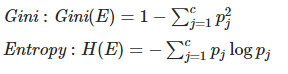

### Where pj  is the probability of an object being classified to a particular class.

## The Decision Tree traversal is to the node with Maximum Information Gain or with Mininum Gini Impurity

### Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in reality which of the two methods is used rarely makes too much of a difference

## Let's see a video that explains how Decision Tree work with some example code

https://www.youtube.com/watch?v=RmajweUFKvM


In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv


In [32]:
df = pd.read_csv("../data/titanic.csv")
df.head(10)
df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


We will be using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

We need to convert ‘Sex’ into an integer value of 0 or 1.

We will also drop any rows with missing values.

We will also drop any rows with missing values.

In [33]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']
#df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

## Using Gini-impurity as the criterion for Splitting the Node

In [34]:
# Split the data to Train and Test sets
from sklearn.model_selection import train_test_split

# Import the Decision Tree Classifier from Sikitlearn
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = tree.DecisionTreeClassifier(criterion='gini')

# Train the model

model.fit(X_train, y_train)

# Score the Predicted Output

y_predict = model.predict(X_test)

# accuracy_score(y_test, y_predict)

# from sklearn.metrics import classification_report, confusion_matrix 
# from sklearn.metrics import accuracy_score

# Print Confusion Matrix, Classification Report and Accuracy Score

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

print(confusion_matrix(y_test,y_predict))  
print(classification_report(y_test,y_predict))  
print(accuracy_score(y_test, y_predict))  
print('=========================================')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

,Predicted Not Survival,Predicted Survival
True Not Survival,106,29
True Survival,23,64


[[106  29]
 [ 23  64]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       135
           1       0.69      0.74      0.71        87

    accuracy                           0.77       222
   macro avg       0.75      0.76      0.76       222
weighted avg       0.77      0.77      0.77       222

0.7657657657657657


## Using Entropy as the criterion for Splitting the Node

In [6]:
# Split the data to Train and Test sets
from sklearn.model_selection import train_test_split

# Import the Decision Tree Classifier from Sikitlearn
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model

model.fit(X_train, y_train)

# Score the Predicted Output

y_predict = model.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print Confusion Matrix, Classification Report and Accuracy Score

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

print(confusion_matrix(y_test,y_predict))  
print(classification_report(y_test,y_predict))  
print(accuracy_score(y_test, y_predict))  
print('=========================================')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

,Predicted Not Survival,Predicted Survival
True Not Survival,105,30
True Survival,22,65


[[105  30]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       135
           1       0.68      0.75      0.71        87

    accuracy                           0.77       222
   macro avg       0.76      0.76      0.76       222
weighted avg       0.77      0.77      0.77       222

0.7657657657657657


## Using Decision Tree to classify Pima Indian women as Diabetic or Not Diabetic

In [15]:
df0 = pd.read_csv("../data/pima-indians-diabetes.csv")

data_mod = df0[(df0.BloodP != 0) & (df0.BMI != 0) & (df0.Glucose != 0)]
data_mod.head(5)
train, test = train_test_split(data_mod, test_size=0.25)
print(data_mod.shape)
print(train.shape)
print(test.shape)
print(data_mod.columns.values)

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(724, 9)
(543, 9)
(181, 9)
['Pregnancies' 'Glucose' 'BloodP' 'SkinThick' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [19]:
y_pima = data_mod['Outcome']
X_pima = data_mod.drop('Outcome', axis=1)



# Import the Decision Tree Classifier from Sikitlearn
from sklearn import tree

X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, random_state=1)

model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model

model.fit(X_train_pima, y_train_pima)

# Score the Predicted Output

y_predict_pima = model.predict(X_test_pima)

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print Confusion Matrix, Classification Report and Accuracy Score

pd.DataFrame(
    confusion_matrix(y_test_pima, y_predict_pima),
    columns=['Predicted Not Diabetic', 'Predicted Diabetic'],
    index=['True Not Diabetic', 'True Diabetic']
)

print(confusion_matrix(y_test_pima,y_predict_pima))  
print(classification_report(y_test_pima,y_predict_pima))  
print(accuracy_score(y_test_pima, y_predict_pima))  
print('=========================================')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

,Predicted Not Diabetic,Predicted Diabetic
True Not Diabetic,90,22
True Diabetic,25,44


[[90 22]
 [25 44]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       112
           1       0.67      0.64      0.65        69

    accuracy                           0.74       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.74      0.74      0.74       181

0.7403314917127072


# Random Forest

**Random Forest** is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

## How the Random Forest Algorithm Works
The following are the basic steps involved in performing the random forest algorithm:

* Pick N random records from the dataset.
* Build a decision tree based on these N records.
* Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
* **In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output).** 
* **The final value can be calculated by taking the average of all the values predicted by all the trees in forest.** 
* **Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs.** 
* **Finally, the new record is assigned to the category that wins the majority vote.**


## Advantages of using Random Forest
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
The random forest algorithm works well when you have both categorical and numerical features.
The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).


## Disadvantages of using Random Forest
A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
Due to their complexity, they require much more time to train than other comparable algorithms.
Throughout the rest of this article we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems.

## Let's see a video on Random Forest 

https://www.youtube.com/watch?v=eM4uJ6XGnSM


## Using Random Forest for Regression
In this section we will study how random forests can be used to solve regression problems using Scikit-Learn. In the next section we will solve classification problem via random forests.

### Problem Definition
The problem here is to predict the 
# gas consumption (in millions of gallons)** in 48 of the US states based on 
* ## petrol tax (in cents), 
* ## per capita income (dollars), 
* ## paved highways (in miles) and the 
* ## proportion of population with the driving license.

### Solution
To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:

Here we will use Random Forest to solve a **Multi-Variate** Regression Analysis.

***Remember, we did the analysis of the same dataset using a Multi-Variate Regression Analysis Model (Check back in your old Python Notebook for Regression Analysis)***

In [21]:
# Read the Data Set

df = pd.read_csv("../data/petrolconsumption.csv")
df.head(10)
df.tail(5)

,Petrol tax,Average income,Paved Highways,Proportion of population with driver licenses,Consumption of petrol
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.0,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


,Petrol tax,Average income,Paved Highways,Proportion of population with driver licenses,Consumption of petrol
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


In [35]:
# Split the data in Train and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

### Feature scaling is a method used to normalize the range of independent variables or features of data

#### We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. 

Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [36]:
X = df.iloc[:, 0:4].values  
y = df.iloc[:, 4].values  

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

## An important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs. 

In [24]:
# Import the Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor

# Create the RF Regressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)  

# Train the Model and Predict

regressor.fit(X_train, y_train)  
y_pred1 = regressor.predict(X_test)  

print(y_test)
print(y_pred1)
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

14     0
158    0
762    0
740    1
482    0
      ..
834    1
672    0
181    0
631    0
140    1
Name: Survived, Length: 178, dtype: int64
[0.93       0.3        0.08       0.3595     0.         0.01
 0.05       0.98       0.9        0.24       0.36       0.88
 0.04483333 0.115      0.0975     0.63       0.97       0.14933333
 0.1        0.         0.02       0.12833333 0.79666667 0.16
 0.97       1.         0.58       0.83816667 0.08       0.
 0.95       0.76       0.89       0.94       0.15       1.
 0.1        0.151      0.35133333 0.05766667 0.02       0.05
 0.42       0.         0.14666667 0.32       0.99       0.01
 0.015      0.21       0.04483333 0.28       0.22       0.36
 0.         0.03       0.78       0.005      0.15       0.
 0.52       0.4        0.05       0.12161905 0.04583333 0.69
 0.09       0.77416667 0.02333333 0.74       0.33       0.07
 0.4        0.99       0.27       0.26       0.08       0.04977778
 0.03       0.27       0.1        0.03       0.18       1.
 

### Evaluating the Algorithm
The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. 

**For regression problems the metrics used to evaluate an algorithm are Mean Absolute Error, Mean Squared Rrror, and Root Mean Squared Error. Remember, we used some of these Measures to check the Accuracy of our Regression Model in past (Check back in your old Python Notebook** 

In [25]:
# from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.2556183342250758
Mean Squared Error: 0.1432520459919715
Root Mean Squared Error: 0.3784865202249236


The following chart shows the decrease in the value of the **Root Mean Squared Error (RMSE) with respect to number of estimators.** Here the X-axis contains the number of estimators while the Y-axis contains the value for root mean squared error.
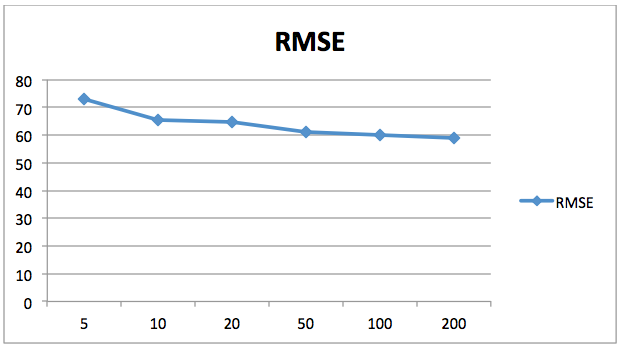


## Using Random Forest for Regression as well as Classification
### Problem Definition
The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

### Solution
This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.

### Data Set Information:

Data were extracted from images that were taken from ***genuine and forged banknote-like specimens***. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

In [26]:
# Read the Data Set

df = pd.read_csv("../data/bill_authentication.csv")
df.head(10)
df.tail(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


As in the previous case, we need to do some scaling of the data

In [27]:
# Split the data into Train and Test sets

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

X = df.iloc[:, 0:4].values  
y = df.iloc[:, 4].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

### In the previous example we used Random Forest for only a Regression problem. In this case we will also use **Random Forest as a Classfier**. and have a comparison 


In [28]:
# Import the Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

# Create the Regressor with 20 Estimators
regressor = RandomForestRegressor(n_estimators= 20, random_state=0)  

# Train the Model
regressor.fit(X_train, y_train)  

#Predict
y_predict3 = regressor.predict(X_test)  

print(y_test)
print(y_predict3)
print('************************************************************')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict3)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
[1.   0.   1.   0.   0.   0.   0.   0.   1.   1.   0.   0.   1.   0.
 0.   0.   1.   1.   0.   0.   1.   0.   0.   1.   0.   1.   0.   1.
 0.   0.   1.   0.   1.   1.   1.   0.   0.   1.   0.95 1.   0.   1.
 0.   0.   1.   1.   0.   0.   1.   0.   0.   1.   0.1  1.   1.   0.
 1.   1.   0.   1.   1.   0.   0.   0.   0.   1.   1.   1.   0.95 0.
 0.85 0.   1.   0.   0.   1.   0.   0.   0.   0.   1.   1.   0.   0.
 1.   1.   0.   0.   0.   0


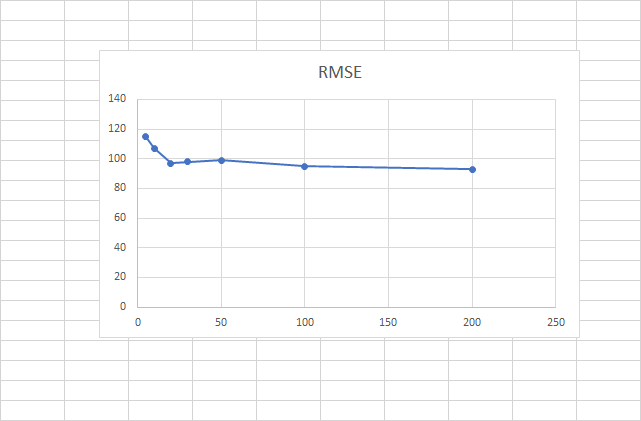


### To use Random Forest as a classifier we will import a Random Forest Classifier and will create a Classifier (instead of a Regressor)

In [29]:
# Import the Random Forest Regressor Model
from sklearn.ensemble import RandomForestClassifier

# Create the Regressor with 20 Estimators
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  

# Train the Model
classifier.fit(X_train, y_train)  

#Predict
y_pred4 = classifier.predict(X_test)  
print(y_test)
print(y_pred4)
print('############################################################')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0

### Now we will Evaluate the Performance of the Classifier model

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred4)) 
print(accuracy_score(y_test, y_pred4))  
print(confusion_matrix(y_test,y_pred4))  

# print(classification_report(y_test,y_pred))  
# print(accuracy_score(y_test, y_pred))  
print('=========================================')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091
[[155   2]
 [  1 117]]


### So the Classifier does a very good job with 99% Accuracy
The following chart shows that the Accuracy of the Classifier does NOT significantly change with the Number of Estimators
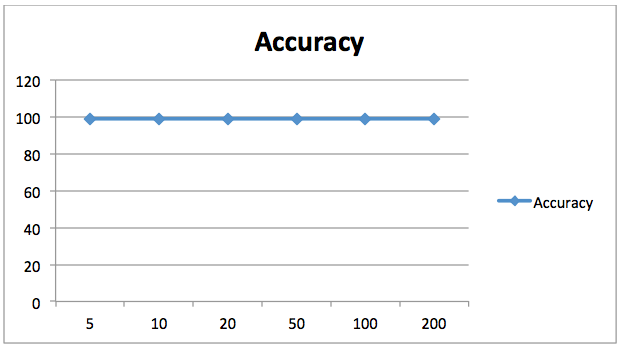